In [4]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
json_path = "Appliances_5.json"

In [6]:
json_data = []
with open(json_path, 'r') as file:
	for line in file:
		json_data.append(json.loads(line))

In [7]:
# Flatten the json data
df = pd.json_normalize(json_data, sep='_')

In [9]:
# Save the data to a csv file
df.to_csv("Appliances_5.csv", index=False)

In [10]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style_Style:,style_Size:,style_Color:,vote,image,style_Size Name:,style_Style Name:,style_Package Quantity:
0,5.0,True,"08 22, 2013",A34A1UP40713F8,B00009W3I4,James. Backus,I like this as a vent as well as something tha...,Great product,1377129600,Dryer Vent,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,True,"02 8, 2016",A1AHW6I678O6F2,B00009W3PA,kevin.,good item,Five Stars,1454889600,NaN,6-Foot,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,True,"08 5, 2015",A8R48NKTGCJDQ,B00009W3PA,CDBrannom,Fit my new LG dryer perfectly.,Five Stars,1438732800,NaN,6-Foot,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,True,"04 24, 2015",AR3OHHHW01A8E,B00009W3PA,Calvin E Reames,Good value for electric dryers,Perfect size,1429833600,NaN,6-Foot,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,True,"03 21, 2015",A2CIEGHZ7L1WWR,B00009W3PA,albert j. kong,Price and delivery was excellent.,Five Stars,1426896000,NaN,6-Foot,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   overall                  2277 non-null   float64
 1   verified                 2277 non-null   bool   
 2   reviewTime               2277 non-null   object 
 3   reviewerID               2277 non-null   object 
 4   asin                     2277 non-null   object 
 5   reviewerName             2277 non-null   object 
 6   reviewText               2277 non-null   object 
 7   summary                  2277 non-null   object 
 8   unixReviewTime           2277 non-null   int64  
 9   style_Style:             4 non-null      object 
 10  style_Size:              11 non-null     object 
 11  style_Color:             8 non-null      object 
 12  vote                     2074 non-null   object 
 13  image                    828 non-null    object 
 14  style_Size Name:        

In [12]:
df.describe()

,overall,unixReviewTime
count,2277.000000,2.277000e+03
mean,4.499780,1.457410e+09
std,0.837723,5.639808e+07
min,1.000000,1.221523e+09
25%,4.000000,1.449274e+09
50%,5.000000,1.478650e+09
75%,5.000000,1.482278e+09
max,5.000000,1.523923e+09


In [13]:
# Distribution of the number of reviews per product
reviews_per_product = df['asin'].value_counts().reset_index()
reviews_per_product.columns = ['product_id', 'num_reviews']
reviews_per_product = reviews_per_product.sort_values(by='num_reviews', ascending=True)

C:\Users\Kirstin Ramos\AppData\Local\Temp\ipykernel_37504\2261050741.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_reviews', y='product_id', data=reviews_per_product, palette="viridis")


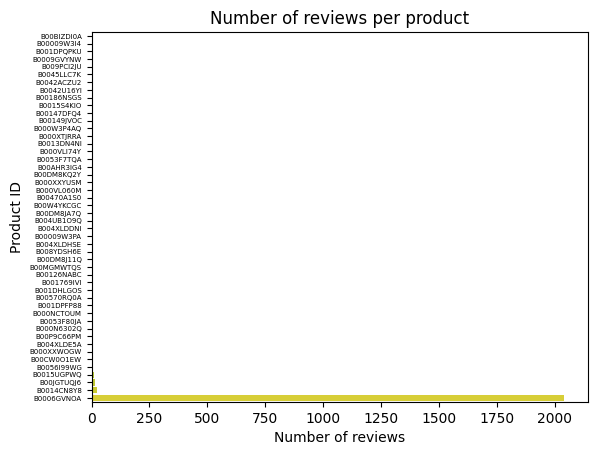

In [14]:
sns.barplot(x='num_reviews', y='product_id', data=reviews_per_product, palette="viridis")
plt.title('Number of reviews per product')
plt.xlabel('Number of reviews')
plt.ylabel('Product ID')
plt.yticks(fontsize=5)
plt.show()

In [15]:
reviews_per_user = df['reviewerID'].value_counts().reset_index()
reviews_per_user.columns = ['user_id', 'num_reviews']
reviews_per_user = reviews_per_user.sort_values(by='num_reviews', ascending=True)

C:\Users\Kirstin Ramos\AppData\Local\Temp\ipykernel_37504\103098909.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_reviews', y='user_id', data=reviews_per_user, palette="viridis")


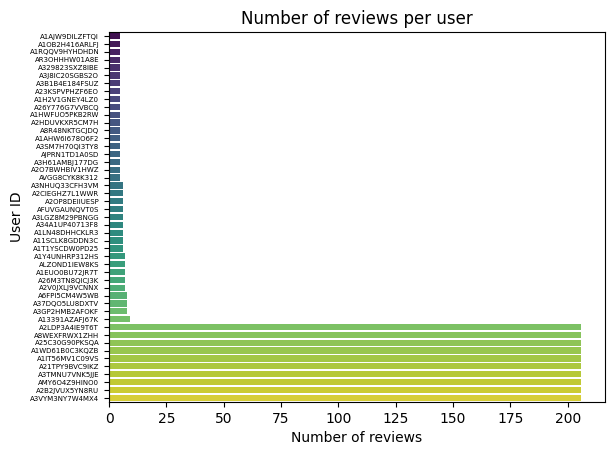

In [36]:
sns.barplot(x='num_reviews', y='user_id', data=reviews_per_user, palette="viridis")
plt.title('Number of reviews per user')
plt.xlabel('Number of reviews')
plt.ylabel('User ID')
plt.yticks(fontsize=5)
plt.show()

In [37]:
# Length of each review
df['review_length'] = df['reviewText'].apply(len)

In [38]:
df['review_length'].agg(['min', 'max', 'mean'])

min        2.000000
max     3932.000000
mean    1481.945103
Name: review_length, dtype: float64

In [39]:
short_reviews = df[df['review_length'] == 2]

In [40]:
short_reviews

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style_Style:,style_Size:,style_Color:,vote,image,style_Size Name:,style_Style Name:,style_Package Quantity:,review_length,sentiment
49,5.0,True,"03 8, 2015",A3B1B4E184FSUZ,B000VL060M,jobeck1,A+,Five Stars,1425772800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Positive
55,5.0,True,"03 8, 2015",A3B1B4E184FSUZ,B0015UGPWQ,jobeck1,A+,Five Stars,1425772800,NaN,NaN,NaN,NaN,NaN,4 Inch,NaN,NaN,2,Positive
88,5.0,True,"03 8, 2015",A3B1B4E184FSUZ,B000VL060M,jobeck1,A+,Five Stars,1425772800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Positive
94,5.0,True,"03 8, 2015",A3B1B4E184FSUZ,B0015UGPWQ,jobeck1,A+,Five Stars,1425772800,NaN,NaN,NaN,NaN,NaN,4 Inch,NaN,NaN,2,Positive
2146,5.0,True,"02 9, 2015",A3B1B4E184FSUZ,B0042U16YI,jobeck1,A+,Five Stars,1423440000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Positive
2210,3.0,True,"07 25, 2016",AJPRN1TD1A0SD,B00BIZDI0A,transporter,ok,Three Stars,1469404800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Neutral


In [41]:
long_reviews = df[df['review_length'] == 3932]

In [42]:
long_reviews

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style_Style:,style_Size:,style_Color:,vote,image,style_Size Name:,style_Style Name:,style_Package Quantity:,review_length,sentiment
9,1.0,False,"11 14, 2014",A3SM7H70QI3TY8,B000N6302Q,SRH,"Be careful, NewAir will not stand by their pro...",NewAir will not stand behind their products - ...,1415923200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3932,Negative
11,1.0,False,"11 14, 2014",A3SM7H70QI3TY8,B000N6302Q,SRH,"Be careful, NewAir will not stand by their pro...",NewAir will not stand behind their products - ...,1415923200,NaN,NaN,Stainless Steel,3,NaN,NaN,NaN,NaN,3932,Negative


In [43]:
df.columns = df.columns.str.strip()  # Remove any leading/trailing spaces


In [44]:
# Check for duplicate reviews based on reviewerID, asin, and reviewText
duplicate_reviews = df.duplicated(subset=["reviewerID", "asin", "reviewText"]).sum()
print(f"Total duplicate reviews: {duplicate_reviews}")


Total duplicate reviews: 2074


In [45]:
# Show a few examples of duplicate reviews
duplicates = df[df.duplicated(subset=["reviewerID", "asin", "reviewText"], keep=False)]
duplicates.head(10)  # Show the first 10 duplicate rows


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style_Style:,style_Size:,style_Color:,vote,image,style_Size Name:,style_Style Name:,style_Package Quantity:,review_length,sentiment
9,1.0,False,"11 14, 2014",A3SM7H70QI3TY8,B000N6302Q,SRH,"Be careful, NewAir will not stand by their pro...",NewAir will not stand behind their products - ...,1415923200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3932,Negative
10,1.0,False,"11 14, 2014",A3SM7H70QI3TY8,B000N6302Q,SRH,We would give less than 1 star if possible DON...,"WHAT A PIECE OF JUNK, NewAir doesn't stand by ...",1415923200,NaN,NaN,Orange,NaN,NaN,NaN,NaN,NaN,580,Negative
11,1.0,False,"11 14, 2014",A3SM7H70QI3TY8,B000N6302Q,SRH,"Be careful, NewAir will not stand by their pro...",NewAir will not stand behind their products - ...,1415923200,NaN,NaN,Stainless Steel,3,NaN,NaN,NaN,NaN,3932,Negative
12,1.0,False,"11 14, 2014",A3SM7H70QI3TY8,B000N6302Q,SRH,We would give less than 1 star if possible DON...,WHAT A PIECE OF JUNK! NewAir doesn't stand by ...,1415923200,NaN,NaN,Blue,NaN,NaN,NaN,NaN,NaN,580,Negative
13,1.0,False,"11 14, 2014",A3SM7H70QI3TY8,B000N6302Q,SRH,We would give less than 1 star if possible DON...,PIECE OF JUNK and NewAir doesn't stand by thei...,1415923200,NaN,NaN,Silver,NaN,NaN,NaN,NaN,NaN,580,Negative
21,5.0,True,"12 6, 2012",A3NHUQ33CFH3VM,B000VLI74Y,Greeny,"Since the motor on my humidifier still works, ...",Helping get another season out of humidifier,1354752000,NaN,1,NaN,7,NaN,NaN,NaN,NaN,399,Positive
22,2.0,False,"08 5, 2011",A3LGZ8M29PBNGG,B000W3P4AQ,nerenttt,i cook only once in a blue moon. i was shocke...,grate scratches so easily,1312502400,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,630,Negative
23,4.0,True,"04 9, 2017",A1T1YSCDW0PD25,B000XTJRRA,Lantana Al,I like this unit but am deducting one star bec...,Good product but limited viewing angles,1491696000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,336,Positive
24,5.0,False,"10 10, 2014",A26M3TN8QICJ3K,B000XXWOGW,Marty Baker,Great. Just what I needed.,Five Stars,1412899200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,Positive
25,3.0,True,"08 29, 2014",A1H2V1GNEY4LZ0,B000XXWOGW,Handyman,The connect did not match up where I had to mo...,Good delivery for the price.,1409270400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,Neutral


In [47]:
# Identify duplicate reviews based on reviewerID, asin, and reviewText
duplicates = df[df.duplicated(subset=["reviewerID", "asin", "reviewText"], keep=False)]

# Save duplicates to a CSV file
duplicates.to_csv("duplicates_reviews.csv", index=False)

print("Duplicate reviews saved as 'duplicates_reviews.csv'")


Duplicate reviews saved as 'duplicates_reviews.csv'


In [48]:
# Remove duplicate reviews based on reviewerID, asin, and reviewText, keeping the first occurrence
df_cleaned = df.drop_duplicates(subset=["reviewerID", "asin", "reviewText"], keep="first")

# Check the new dataset size after removing duplicates
print(f"New dataset size after removing duplicates: {df_cleaned.shape}")


New dataset size after removing duplicates: (203, 19)


In [50]:
# Define sentiment labels based on the 'overall' rating column
def label_sentiment(rating):
    if rating in [4, 5]: 
        return "Positive"
    elif rating == 3: 
        return "Neutral"
    elif rating in [1, 2]: 
        return "Negative"
    else: 
        return "Unknown"  # To handle unexpected values

# Apply sentiment labeling
df_cleaned["sentiment"] = df_cleaned["overall"].apply(label_sentiment)

# Display a sample to verify the labeling
df_cleaned[["overall", "sentiment"]].head()

# Count sentiment distribution
df_cleaned["sentiment"].value_counts()

C:\Users\Kirstin Ramos\AppData\Local\Temp\ipykernel_37504\1657787581.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["sentiment"] = df_cleaned["overall"].apply(label_sentiment)


sentiment
Positive    178
Negative     16
Neutral       9
Name: count, dtype: int64

In [54]:
# Check for outliers
# Check unique values and their counts
print(df_cleaned["overall"].value_counts())

overall
5.0    165
4.0     13
2.0     11
3.0      9
1.0      5
Name: count, dtype: int64


In [55]:
# Find extremely short reviews
short_reviews = df_cleaned[df_cleaned["review_length"] < 5]
print(f"Short reviews (less than 5 chars): {short_reviews.shape[0]} rows")

# Find extremely long reviews
long_reviews = df_cleaned[df_cleaned["review_length"] > df_cleaned["review_length"].quantile(0.99)]
print(f"Extremely long reviews (above 99th percentile): {long_reviews.shape[0]} rows")


Short reviews (less than 5 chars): 14 rows
Extremely long reviews (above 99th percentile): 3 rows


In [58]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # 25th percentile
    Q3 = data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Find outliers in review length
outliers_review_length = detect_outliers_iqr(df_cleaned, "review_length")
print(f"Outliers in review length: {outliers_review_length.shape[0]} rows")


Outliers in review length: 35 rows


In [57]:
# Remove outliers based on review length using IQR
df_cleaned_no_outliers = df_cleaned[~df_cleaned.index.isin(outliers_review_length.index)]

# Save cleaned data
df_cleaned_no_outliers.to_csv("cleaned_no_outliers.csv", index=False)
print("Saved cleaned dataset without outliers as 'cleaned_no_outliers.csv'")


Saved cleaned dataset without outliers as 'cleaned_no_outliers.csv'
